In [2]:
path="c:\\pytest\\"

In [16]:
import pandas as pd
df = pd.read_csv(path+'iris.csv')
df.head()
# 구해야 할 것, 각 컬럼과 숫자들의 규모 차이->스케일링해야 할지, 데이터의 유형

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
df.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [18]:
df = df.sample(frac=1)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
99,5.7,2.8,4.1,1.3,versicolor
126,6.2,2.8,4.8,1.8,virginica
33,5.5,4.2,1.4,0.2,setosa
97,6.2,2.9,4.3,1.3,versicolor
37,4.9,3.6,1.4,0.1,setosa


In [19]:
df.nunique()

Sepal.Length    35
Sepal.Width     23
Petal.Length    43
Petal.Width     22
Species          3
dtype: int64

In [20]:
df.Species.unique()

array(['versicolor', 'virginica', 'setosa'], dtype=object)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 99 to 59
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [22]:
len(df)

150

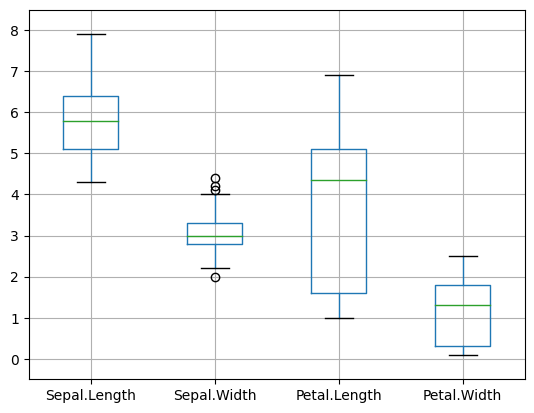

In [23]:
import matplotlib.pyplot as plt
df.boxplot()
plt.ylim((-0.5,8.5))
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :4]
y = df.iloc[:, 4]

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.head())
print("*"*20)
print(X_test.head())


     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
73            6.1          2.8           4.7          1.2
41            4.5          2.3           1.3          0.3
120           6.9          3.2           5.7          2.3
132           6.4          2.8           5.6          2.2
34            4.9          3.1           1.5          0.2
********************
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
117           7.7          3.8           6.7          2.2
12            4.8          3.0           1.4          0.1
46            5.1          3.8           1.6          0.2
30            4.8          3.1           1.6          0.2
103           6.3          2.9           5.6          1.8


In [31]:
df_num = df.select_dtypes(include=[float])
df_obj = df.select_dtypes(exclude=[float])

In [54]:
from sklearn.preprocessing import LabelEncoder
e = LabelEncoder()
e.fit(y_train)
y_train_transformed = e.transform(y_train)
y_train_transformed


array([1, 0, 2, 2, 0, 1, 1, 1, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 0, 2, 1,
       0, 1, 2, 1, 1, 2, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0,
       2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2,
       1, 2, 2, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 2, 0, 1, 1, 0, 0, 2,
       0, 2])

In [33]:
y_train

73     versicolor
41         setosa
120     virginica
132     virginica
34         setosa
          ...    
3          setosa
24         setosa
128     virginica
1          setosa
113     virginica
Name: Species, Length: 112, dtype: object

In [45]:
sorted(zip(y_train.unique(), e.transform(y_train.unique())),key=lambda x:x[1])

[('setosa', 0), ('versicolor', 1), ('virginica', 2)]

In [47]:
dict(zip(y_train.unique(), e.transform(y_train.unique())))

{'versicolor': 1, 'setosa': 0, 'virginica': 2}

In [48]:
# transform 할 때 여러 컬럼이 있으면 변환되는지
# 변환되면 y_test는 컬럼이 하나인데 변환이 되는지
## 어차피 ytrain에 값이 없는 것이 ytest에 있으면 오류남

In [56]:
import tensorflow as tf
y_train_one_hot_encoding = tf.keras.utils.to_categorical(y_train_transformed)
y_train_one_hot_encoding

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [60]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='acc')
model.fit(X_train, y_train_one_hot_encoding, epochs=20, batch_size=1)

Epoch 1/20
112/112 [==============================] - 2s 4ms/step - loss: 1.4063 - acc: 0.3036
Epoch 2/20
112/112 [==============================] - 0s 4ms/step - loss: 0.9075 - acc: 0.4821
Epoch 3/20
112/112 [==============================] - 0s 4ms/step - loss: 0.7849 - acc: 0.6518
Epoch 4/20
112/112 [==============================] - 0s 4ms/step - loss: 0.6976 - acc: 0.7768
Epoch 5/20
112/112 [==============================] - 0s 4ms/step - loss: 0.6409 - acc: 0.7589
Epoch 6/20
112/112 [==============================] - 0s 4ms/step - loss: 0.5785 - acc: 0.8661
Epoch 7/20
112/112 [==============================] - 0s 4ms/step - loss: 0.5506 - acc: 0.8036
Epoch 8/20
112/112 [==============================] - 0s 4ms/step - loss: 0.5041 - acc: 0.8929
Epoch 9/20
112/112 [==============================] - 0s 4ms/step - loss: 0.4883 - acc: 0.8571
Epoch 10/20
112/112 [==============================] - 0s 4ms/step - loss: 0.4539 - acc: 0.9107
Epoch 11/20
112/112 [============================

In [61]:
y_test = e.transform(y_test)
y_test

array([2, 0, 0, 0, 2, 2, 1, 1, 1, 2, 0, 1, 1, 2, 0, 2, 1, 2, 2, 0, 2, 0,
       0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 0, 2, 2, 2])

In [62]:
y_test_one_hot_encoding = tf.keras.utils.to_categorical(y_test)
y_test_one_hot_encoding

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [64]:
model.evaluate(X_test, y_test_one_hot_encoding)[1]

2/2 [==============================] - 0s 4ms/step - loss: 0.3026 - acc: 0.9211


0.9210526347160339

In [65]:
import os
os.chdir("c:\\projects")

model.save('iris.h5')

from tensorflow.keras.models import load_model
loaded_model = load_model('iris.h5')

In [66]:
loaded_model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


array([[8.7406934e-04, 3.6335543e-01, 6.3577050e-01],
       [9.5340574e-01, 4.6475366e-02, 1.1890223e-04],
       [9.5462209e-01, 4.5324009e-02, 5.3952193e-05],
       [9.2811972e-01, 7.1642511e-02, 2.3771716e-04],
       [2.1275014e-03, 3.2957897e-01, 6.6829354e-01],
       [3.6054414e-03, 4.4393256e-01, 5.5246198e-01],
       [4.7744814e-02, 7.6995087e-01, 1.8230431e-01],
       [1.6843846e-02, 6.3022256e-01, 3.5293356e-01],
       [6.1753683e-02, 7.9586565e-01, 1.4238065e-01],
       [1.8858975e-03, 3.6804864e-01, 6.3006550e-01],
       [9.5185840e-01, 4.8067935e-02, 7.3663628e-05],
       [3.8777888e-02, 8.0869704e-01, 1.5252504e-01],
       [2.4841376e-02, 7.0527083e-01, 2.6988786e-01],
       [1.1579072e-03, 3.1827179e-01, 6.8057036e-01],
       [9.3818402e-01, 6.1737236e-02, 7.8717523e-05],
       [7.9856245e-03, 5.3172523e-01, 4.6028912e-01],
       [6.9011129e-02, 7.7481377e-01, 1.5617505e-01],
       [3.1937230e-03, 5.8062959e-01, 4.1617671e-01],
       [8.2782097e-04, 2.308

In [118]:
n=int(input())
v=dict()
for i in range(1,n+1):
    for j in range(1,n+1):
        if i!=j and j in v.values:
            v[i]=j
            break
print(v)


TypeError: argument of type 'builtin_function_or_method' is not iterable

In [131]:
new_data = dict(zip(X_train.columns, [5.3,3.4,1.4,0.2]))
new_data

{0: 5.3, 1: 3.4, 2: 1.4, 3: 0.2}

In [135]:
new_data = pd.DataFrame.from_dict(new_data)
new_data

,0,1,2,3
0,5.3,3.4,1.4,0.2


In [87]:
result = loaded_model.predict(new_data)
result 

1/1 [==============================] - 0s 20ms/step


array([[9.6489555e-01, 3.5059061e-02, 4.5452121e-05]], dtype=float32)

In [89]:
import numpy as np
result_idx = np.argmax(result)

if result_idx==0:
    print("setosa")
elif result_idx==1:
    print("versicolor")
else:
    print("virginica")

setosa


In [95]:
import pandas as pd
df = pd.read_csv('c:\\pytest\\wine.csv', header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [97]:
df = df.sample(frac=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
1660,6.0,0.19,0.26,12.4,0.048,50.0,147.0,0.99720,3.30,0.36,8.9,6,0
498,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8,1
5877,5.6,0.18,0.29,2.3,0.040,5.0,47.0,0.99126,3.07,0.45,10.1,4,0
229,6.9,0.52,0.25,2.6,0.081,10.0,37.0,0.99685,3.46,0.50,11.0,5,1
146,5.8,0.68,0.02,1.8,0.087,21.0,94.0,0.99440,3.54,0.52,10.0,5,1


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 1660 to 4313
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [108]:
X=df.iloc[:,:12]
y=df.iloc[:,12]

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X_train.head())
print("*"*30)
print(X_test.head())

       0      1     2    3      4     5      6        7     8     9     10  11
187   7.7  0.705  0.10  2.6  0.084   9.0   26.0  0.99760  3.39  0.49   9.7   5
819   9.1  0.660  0.15  3.2  0.097   9.0   59.0  0.99976  3.28  0.54   9.6   5
2710  8.0  0.180  0.37  1.3  0.040  15.0   96.0  0.99120  3.06  0.61  12.1   6
2727  5.7  0.100  0.27  1.3  0.047  21.0  100.0  0.99280  3.27  0.46   9.5   5
5053  5.8  0.540  0.00  1.4  0.033  40.0  107.0  0.98918  3.26  0.35  12.4   5
******************************
       0     1     2    3      4     5      6        7     8     9     10  11
5305  6.6  0.15  0.34  1.0  0.037  45.0   79.0  0.98949  2.96  0.50  11.7   6
3742  6.5  0.14  0.32  2.7  0.037  18.0   89.0  0.99240  3.40  0.74  11.5   7
3057  7.1  0.22  0.74  2.7  0.044  42.0  144.0  0.99100  3.31  0.41  12.2   6
1771  7.6  0.48  0.37  0.8  0.037   4.0  100.0  0.99020  3.03  0.39  11.4   4
3175  6.2  0.27  0.49  1.4  0.050  20.0   74.0  0.99310  3.32  0.44   9.8   6


In [111]:
X_train.nunique()

0     102
1     181
2      87
3     296
4     199
5     127
6     268
7     927
8     107
9     107
10    104
11      7
dtype: int64

In [115]:
sorted(X_test[11].unique())

[3, 4, 5, 6, 7, 8, 9]

In [119]:
model = Sequential()
model.add(Dense(30, 'relu', input_dim=12))
model.add(Dense(16, 'relu'))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'sigmoid'))



In [120]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 30)                390       
                                                                 
 dense_3 (Dense)             (None, 16)                496       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,031
Trainable params: 1,031
Non-trainable params: 0
_________________________________________________________________


In [127]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='acc')
model.fit(X_train, y_train, epochs=200, batch_size=200)

Epoch 1/200
25/25 [==============================] - 1s 6ms/step - loss: 0.3389 - acc: 0.8762
Epoch 2/200
25/25 [==============================] - 0s 7ms/step - loss: 0.2431 - acc: 0.9152
Epoch 3/200
25/25 [==============================] - 0s 8ms/step - loss: 0.2277 - acc: 0.9191
Epoch 4/200
25/25 [==============================] - 0s 7ms/step - loss: 0.2185 - acc: 0.9208
Epoch 5/200
25/25 [==============================] - 0s 6ms/step - loss: 0.2093 - acc: 0.9228
Epoch 6/200
25/25 [==============================] - 0s 6ms/step - loss: 0.1992 - acc: 0.9292
Epoch 7/200
25/25 [==============================] - 0s 7ms/step - loss: 0.1916 - acc: 0.9321
Epoch 8/200
25/25 [==============================] - 0s 6ms/step - loss: 0.1838 - acc: 0.9366
Epoch 9/200
25/25 [==============================] - 0s 6ms/step - loss: 0.1821 - acc: 0.9349
Epoch 10/200
25/25 [==============================] - 0s 7ms/step - loss: 0.1715 - acc: 0.9399
Epoch 11/200
25/25 [==============================] - 0s 7m

In [128]:
evaluation = model.evaluate(X_test, y_test)
print("loss: ", evaluation[0])
print("acc: ", evaluation[1])

51/51 [==============================] - 0s 5ms/step - loss: 0.0572 - acc: 0.9822
loss:  0.057156164199113846
acc:  0.9821538329124451


In [136]:
import pandas as pd
df = pd.read_csv('c:\\pytest\\wine.csv', header=None)
df = df.sample(frac=1)

X=df.iloc[:,:12]
y=df.iloc[:,12]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [148]:
model = Sequential()
model.add(Dense(30, 'relu', input_dim=12))
model.add(Dense(16, 'relu'))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics='acc')

In [149]:
history = model.fit(X_train, y_train, epochs=200, batch_size=200, validation_split=0.2)

Epoch 1/200
21/21 [==============================] - 1s 18ms/step - loss: 0.9785 - acc: 0.6769 - val_loss: 0.6537 - val_acc: 0.7740
Epoch 2/200
21/21 [==============================] - 0s 11ms/step - loss: 0.4919 - acc: 0.8242 - val_loss: 0.3171 - val_acc: 0.8750
Epoch 3/200
21/21 [==============================] - 0s 11ms/step - loss: 0.3050 - acc: 0.9002 - val_loss: 0.2856 - val_acc: 0.8933
Epoch 4/200
21/21 [==============================] - 0s 11ms/step - loss: 0.2660 - acc: 0.9023 - val_loss: 0.2563 - val_acc: 0.9067
Epoch 5/200
21/21 [==============================] - 0s 9ms/step - loss: 0.2428 - acc: 0.9148 - val_loss: 0.2438 - val_acc: 0.9135
Epoch 6/200
21/21 [==============================] - 0s 10ms/step - loss: 0.2354 - acc: 0.9185 - val_loss: 0.2380 - val_acc: 0.9144
Epoch 7/200
21/21 [==============================] - 0s 9ms/step - loss: 0.2311 - acc: 0.9204 - val_loss: 0.2343 - val_acc: 0.9135
Epoch 8/200
21/21 [==============================] - 0s 10ms/step - loss: 0.22

In [150]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

val_acc

[0.7740384340286255,
 0.875,
 0.8932692408561707,
 0.9067307710647583,
 0.9134615659713745,
 0.9144230484962463,
 0.9134615659713745,
 0.9144230484962463,
 0.9163461327552795,
 0.9163461327552795,
 0.9211538434028625,
 0.9259615540504456,
 0.9240384697914124,
 0.9269230961799622,
 0.9278846383094788,
 0.9307692050933838,
 0.9288461804389954,
 0.932692289352417,
 0.932692289352417,
 0.9346153736114502,
 0.9336538314819336,
 0.9365384578704834,
 0.9442307949066162,
 0.9471153616905212,
 0.9461538195610046,
 0.9451923370361328,
 0.9490384459495544,
 0.9557692408561707,
 0.9576923251152039,
 0.9528846144676208,
 0.9538461565971375,
 0.9528846144676208,
 0.9538461565971375,
 0.954807698726654,
 0.9586538672447205,
 0.9557692408561707,
 0.9576923251152039,
 0.9634615182876587,
 0.9624999761581421,
 0.9663461446762085,
 0.9644230604171753,
 0.9634615182876587,
 0.9663461446762085,
 0.9644230604171753,
 0.9663461446762085,
 0.9634615182876587,
 0.9701923131942749,
 0.9673076868057251,
 0.96442

In [151]:
for i in val_acc:
    print(round(i, 3), end='\t')

0.774	0.875	0.893	0.907	0.913	0.914	0.913	0.914	0.916	0.916	0.921	0.926	0.924	0.927	0.928	0.931	0.929	0.933	0.933	0.935	0.934	0.937	0.944	0.947	0.946	0.945	0.949	0.956	0.958	0.953	0.954	0.953	0.954	0.955	0.959	0.956	0.958	0.963	0.962	0.966	0.964	0.963	0.966	0.964	0.966	0.963	0.97	0.967	0.964	0.967	0.967	0.971	0.97	0.968	0.968	0.966	0.971	0.97	0.97	0.972	0.966	0.971	0.968	0.968	0.971	0.97	0.972	0.973	0.971	0.969	0.971	0.968	0.97	0.972	0.971	0.97	0.972	0.972	0.971	0.969	0.972	0.973	0.969	0.973	0.972	0.972	0.972	0.969	0.972	0.971	0.97	0.973	0.972	0.972	0.971	0.974	0.973	0.971	0.971	0.973	0.973	0.973	0.974	0.973	0.973	0.972	0.972	0.973	0.973	0.973	0.973	0.973	0.973	0.974	0.973	0.975	0.975	0.973	0.972	0.969	0.973	0.974	0.974	0.972	0.973	0.973	0.972	0.976	0.973	0.975	0.974	0.976	0.973	0.974	0.973	0.973	0.975	0.974	0.976	0.973	0.972	0.973	0.976	0.974	0.977	0.973	0.974	0.972	0.974	0.972	0.974	0.973	0.976	0.975	0.978	0.973	0.978	0.976	0.973	0.973	0.976	0.972	0.974	0.974	0.974	0.973	0.972	0.974	

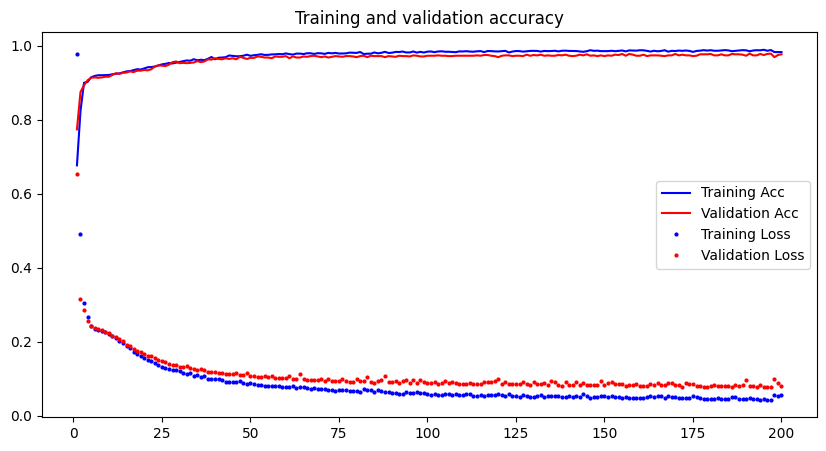

In [160]:
epochs = range(1,len(acc)+1)
plt.figure(figsize=(10,5))
plt.plot(epochs, acc,'b', label='Training Acc', markersize=2)
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.plot(epochs, loss, 'bo', label='Training Loss', markersize=2)
plt.plot(epochs, val_loss, 'ro', label='Validation Loss', markersize=2)
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [158]:
model.evaluate(X_test, y_test)[1]

41/41 [==============================] - 0s 5ms/step - loss: 0.0488 - acc: 0.9831


0.9830769300460815

In [161]:
import os
model_dir='c:\\projects\\'
os.chdir(model_dir)
model.save('my_model.h5')

from tensorflow.keras.models import load_model
loaded_model = load_model('my_model.h5')

In [164]:
from keras.callbacks import ModelCheckpoint
modelpath = model_dir+'model\\'+'{epoch:03d}-{val_loss:.4f}.h5'

checkpointer = ModelCheckpoint(
    filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
model.fit(X_train, y_train, epochs=200, batch_size=200,
          validation_split=.2, verbose=1, callbacks=[checkpointer])


Epoch 1/200
17/21 [=======================>......] - ETA: 0s - loss: 0.0375 - acc: 0.9900
Epoch 1: val_loss improved from inf to 0.09446, saving model to c:\projects\model\001-0.0945.h5
21/21 [==============================] - 0s 13ms/step - loss: 0.0377 - acc: 0.9887 - val_loss: 0.0945 - val_acc: 0.9760
Epoch 2/200
19/21 [==========================>...] - ETA: 0s - loss: 0.0338 - acc: 0.9900
Epoch 2: val_loss improved from 0.09446 to 0.08049, saving model to c:\projects\model\002-0.0805.h5
21/21 [==============================] - 0s 10ms/step - loss: 0.0340 - acc: 0.9901 - val_loss: 0.0805 - val_acc: 0.9769
Epoch 3/200
16/21 [=====================>........] - ETA: 0s - loss: 0.0343 - acc: 0.9891
Epoch 3: val_loss did not improve from 0.08049
21/21 [==============================] - 0s 10ms/step - loss: 0.0385 - acc: 0.9882 - val_loss: 0.0809 - val_acc: 0.9788
Epoch 4/200
18/21 [========================>.....] - ETA: 0s - loss: 0.0425 - acc: 0.9878
Epoch 4: val_loss did not improve fro

In [166]:
from tensorflow.keras.models import load_model
loaded_model = load_model('c:\\projects\\model\\031-0.0739.h5')

In [167]:
loaded_model.predict(X_test)

41/41 [==============================] - 0s 2ms/step


array([[9.9999106e-01],
       [3.7721274e-03],
       [1.0000000e+00],
       ...,
       [1.0000000e+00],
       [5.6207500e-04],
       [5.7599753e-01]], dtype=float32)

In [168]:
loaded_model.evaluate(X_test, y_test)[1]

41/41 [==============================] - 0s 4ms/step - loss: 0.0358 - acc: 0.9908


0.9907692074775696

In [ ]:
# https://datahub.io/machine-learning/sonar%23resource-sonar#resource-sonar_zip

In [209]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

df = pd.read_csv('c:\\pytest\\sonar.csv')
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1
], random_state=1111)


In [185]:
y_train.unique(), y_test.unique()

(array(['Mine', 'Rock'], dtype=object), array(['Mine', 'Rock'], dtype=object))

In [187]:
e = LabelEncoder()
e.fit(y_train)
y_train_transformed = e.transform(y_train)
y_test_transformed = e.transform(y_test)
y_train_one_hot_encoding = to_categorical(y_train_transformed)
y_test_one_hot_encoding = to_categorical(y_test_transformed)


In [194]:
dict(zip(y_test.unique(), e.transform(y_test.unique())))


{'Mine': 0, 'Rock': 1}

In [211]:
model = Sequential()
model.add(Dense(40, 'relu', input_dim=len(X_train.columns)))
model.add(Dense(50, 'relu'))
model.add(Dense(20, 'relu'))
model.add(Dense(10, 'relu'))
model.add(Dense(2, 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 40)                2440      
                                                                 
 dense_40 (Dense)            (None, 50)                2050      
                                                                 
 dense_41 (Dense)            (None, 20)                1020      
                                                                 
 dense_42 (Dense)            (None, 10)                210       
                                                                 
 dense_43 (Dense)            (None, 2)                 22        
                                                                 
Total params: 5,742
Trainable params: 5,742
Non-trainable params: 0
_________________________________________________________________


In [212]:
modelpath = model_dir+'model\\'+'{epoch:03d}-{val_loss:.4f}.h5'

checkpointer = ModelCheckpoint(
    filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train_one_hot_encoding,
                    epochs=200, batch_size=1, validation_split=.15, verbose=1, callbacks=[checkpointer])


Epoch 1/200
129/132 [============================>.] - ETA: 0s - loss: 0.6904 - acc: 0.5349
Epoch 1: val_loss improved from inf to 0.70036, saving model to c:\projects\model\001-0.7004.h5
132/132 [==============================] - 1s 8ms/step - loss: 0.6899 - acc: 0.5455 - val_loss: 0.7004 - val_acc: 0.4167
Epoch 2/200
130/132 [============================>.] - ETA: 0s - loss: 0.6748 - acc: 0.6154
Epoch 2: val_loss improved from 0.70036 to 0.66491, saving model to c:\projects\model\002-0.6649.h5
132/132 [==============================] - 1s 6ms/step - loss: 0.6731 - acc: 0.6212 - val_loss: 0.6649 - val_acc: 0.6250
Epoch 3/200
130/132 [============================>.] - ETA: 0s - loss: 0.6209 - acc: 0.6385
Epoch 3: val_loss did not improve from 0.66491
132/132 [==============================] - 1s 5ms/step - loss: 0.6194 - acc: 0.6439 - val_loss: 0.6812 - val_acc: 0.5833
Epoch 4/200
122/132 [==========================>...] - ETA: 0s - loss: 0.5555 - acc: 0.7295
Epoch 4: val_loss did not 

In [213]:
from tensorflow.keras.models import load_model
loaded_model = load_model('c:\\projects\\model\\034-0.4144.h5')

loaded_model.predict(X_test)


2/2 [==============================] - 0s 2ms/step


array([[9.9714547e-01, 4.0865089e-03],
       [4.6205949e-02, 9.3454587e-01],
       [9.9682957e-01, 4.8730816e-03],
       [8.9776754e-01, 1.0215719e-01],
       [1.0002599e-03, 9.9854267e-01],
       [3.1997092e-02, 9.5073199e-01],
       [4.4721950e-02, 9.3214977e-01],
       [9.7493166e-03, 9.8868561e-01],
       [6.9094570e-03, 9.8848468e-01],
       [9.9683541e-01, 4.5734798e-03],
       [5.1497483e-01, 3.7378544e-01],
       [9.9597895e-01, 6.1088637e-03],
       [9.6054429e-01, 4.3196928e-02],
       [4.1349478e-02, 9.4068885e-01],
       [9.9907303e-01, 1.4178486e-03],
       [9.9883956e-01, 1.8803085e-03],
       [2.5930258e-03, 9.9640995e-01],
       [1.3134089e-02, 9.7747117e-01],
       [8.9646812e-04, 9.9873632e-01],
       [9.8975253e-01, 1.4569388e-02],
       [1.4252107e-01, 7.7508622e-01],
       [8.3092725e-01, 1.6545197e-01],
       [9.9068820e-01, 1.2698880e-02],
       [5.9981757e-01, 3.3361301e-01],
       [7.0092326e-05, 9.9986911e-01],
       [4.9102873e-02, 9.

In [214]:
loaded_model.evaluate(X_test, y_test_one_hot_encoding)[1]


2/2 [==============================] - 0s 5ms/step - loss: 0.5263 - acc: 0.7885


0.7884615659713745

### other

In [224]:
model = Sequential()
model.add(Dense(40, 'relu', input_dim=len(X_train.columns)))
model.add(Dense(60, 'relu'))
model.add(Dense(30, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(Dense(10, 'relu'))
model.add(Dense(2, 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')
model.summary()

modelpath = model_dir+'model\\'+'model2-{epoch:03d}-{val_loss:.4f}.h5'

checkpointer = ModelCheckpoint(
    filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

model.fit(X_train, y_train_one_hot_encoding,
                    epochs=150, batch_size=1, validation_split=.15, verbose=1, callbacks=[checkpointer])

from tensorflow.keras.models import load_model
import glob

print(glob.glob('c:\\projects\\model\\m*')[-1])
filename = glob.glob('c:\\projects\\model\\m*')[-1]
loaded_model = load_model(filename)
loaded_model.predict(X_test)
loaded_model.evaluate(X_test, y_test_one_hot_encoding)[1]

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 40)                2440      
                                                                 
 dense_51 (Dense)            (None, 60)                2460      
                                                                 
 dense_52 (Dense)            (None, 30)                1830      
                                                                 
 dense_53 (Dense)            (None, 10)                310       
                                                                 
 dense_54 (Dense)            (None, 2)                 22        
                                                                 
Total params: 7,062
Trainable params: 7,062
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
126/132 [===========================>..

OSError: No file or directory found at c:\projects\model\c:\projects\model\model2-035-0.3154.h5

In [225]:
loaded_model = load_model(filename)
loaded_model.predict(X_test)
loaded_model.evaluate(X_test, y_test_one_hot_encoding)[1]

2/2 [==============================] - 0s 6ms/step - loss: 0.6125 - acc: 0.8654


0.8653846383094788

In [226]:
model = Sequential()
model.add(Dense(30, 'relu', input_dim=len(X_train.columns)))
model.add(Dense(40, 'relu'))
model.add(Dense(10, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(Dense(2, 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')
model.summary()

modelpath = model_dir+'model\\'+'model3-{epoch:03d}-{val_loss:.4f}.h5'

checkpointer = ModelCheckpoint(
    filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

model.fit(X_train, y_train_one_hot_encoding,
                    epochs=80, batch_size=1, validation_split=.15, verbose=1, callbacks=[checkpointer])

from tensorflow.keras.models import load_model
import glob

print(glob.glob('c:\\projects\\model\\m*')[-1])
filename = glob.glob('c:\\projects\\model\\m*')[-1]
loaded_model = load_model(filename)
loaded_model.predict(X_test)
loaded_model.evaluate(X_test, y_test_one_hot_encoding)[1]

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 30)                1830      
                                                                 
 dense_56 (Dense)            (None, 40)                1240      
                                                                 
 dense_57 (Dense)            (None, 10)                410       
                                                                 
 dense_58 (Dense)            (None, 2)                 22        
                                                                 
Total params: 3,502
Trainable params: 3,502
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
127/132 [===========================>..] - ETA: 0s - loss: 0.6940 - acc: 0.5354
Epoch 1: val_loss improved from inf to 0.66624, saving model to c:\projects\model\model3-001

0.8461538553237915

In [229]:
model = Sequential()
model.add(Dense(30, 'relu', input_dim=len(X_train.columns)))
model.add(Dense(40, 'relu'))
model.add(Dense(20, 'relu'))
model.add(Dense(2, 'softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')
model.summary()

modelpath = model_dir+'model\\'+'model5-{epoch:03d}-{val_loss:.4f}.h5'

checkpointer = ModelCheckpoint(
    filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

model.fit(X_train, y_train_one_hot_encoding,
                    epochs=100, batch_size=1, validation_split=.15, verbose=1, callbacks=[checkpointer])

from tensorflow.keras.models import load_model
import glob

print(glob.glob('c:\\projects\\model\\m*')[-1])
filename = glob.glob('c:\\projects\\model\\m*')[-1]
loaded_model = load_model(filename)
loaded_model.predict(X_test)
loaded_model.evaluate(X_test, y_test_one_hot_encoding)[1]

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 30)                1830      
                                                                 
 dense_68 (Dense)            (None, 40)                1240      
                                                                 
 dense_69 (Dense)            (None, 20)                820       
                                                                 
 dense_70 (Dense)            (None, 2)                 42        
                                                                 
Total params: 3,932
Trainable params: 3,932
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
128/132 [============================>.] - ETA: 0s - loss: 0.6823 - acc: 0.5547
Epoch 1: val_loss improved from inf to 0.66461, saving model to c:\projects\model\model5-00

0.8461538553237915

In [230]:
model = Sequential()
model.add(Dense(30, 'relu', input_dim=len(X_train.columns)))
model.add(Dense(40, 'relu'))
model.add(Dense(20, 'relu'))
model.add(Dense(2, 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')
model.summary()

modelpath = model_dir+'model\\'+'model6-{epoch:03d}-{val_loss:.4f}.h5'

checkpointer = ModelCheckpoint(
    filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

model.fit(X_train, y_train_one_hot_encoding,
                    epochs=100, batch_size=1, validation_split=.15, verbose=1, callbacks=[checkpointer])

from tensorflow.keras.models import load_model
import glob

print(glob.glob('c:\\projects\\model\\m*')[-1])
filename = glob.glob('c:\\projects\\model\\m*')[-1]
loaded_model = load_model(filename)
loaded_model.predict(X_test)
loaded_model.evaluate(X_test, y_test_one_hot_encoding)[1]

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 30)                1830      
                                                                 
 dense_72 (Dense)            (None, 40)                1240      
                                                                 
 dense_73 (Dense)            (None, 20)                820       
                                                                 
 dense_74 (Dense)            (None, 2)                 42        
                                                                 
Total params: 3,932
Trainable params: 3,932
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
131/132 [============================>.] - ETA: 0s - loss: 0.6946 - acc: 0.5267
Epoch 1: val_loss improved from inf to 0.67675, saving model to c:\projects\model\model6-00

0.8846153616905212

In [231]:
model = Sequential()
model.add(Dense(70, 'relu', input_dim=len(X_train.columns)))
model.add(Dense(100, 'relu'))
model.add(Dense(30, 'relu'))
model.add(Dense(2, 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')
model.summary()

modelpath = model_dir+'model\\'+'model7-{epoch:03d}-{val_loss:.4f}.h5'

checkpointer = ModelCheckpoint(
    filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

model.fit(X_train, y_train_one_hot_encoding,
                    epochs=120, batch_size=1, validation_split=.15, verbose=1, callbacks=[checkpointer])

from tensorflow.keras.models import load_model
import glob

print(glob.glob('c:\\projects\\model\\m*')[-1])
filename = glob.glob('c:\\projects\\model\\m*')[-1]
loaded_model = load_model(filename)
loaded_model.predict(X_test)
loaded_model.evaluate(X_test, y_test_one_hot_encoding)[1]

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 70)                4270      
                                                                 
 dense_76 (Dense)            (None, 100)               7100      
                                                                 
 dense_77 (Dense)            (None, 30)                3030      
                                                                 
 dense_78 (Dense)            (None, 2)                 62        
                                                                 
Total params: 14,462
Trainable params: 14,462
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
125/132 [===========================>..] - ETA: 0s - loss: 0.6765 - acc: 0.5680
Epoch 1: val_loss improved from inf to 0.66999, saving model to c:\projects\model\model7-

0.8653846383094788

In [234]:
model = Sequential()
model.add(Dense(70, 'relu', input_dim=len(X_train.columns)))
model.add(Dense(100, 'relu'))
model.add(Dense(60, 'relu'))
model.add(Dense(2, 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='acc')
model.summary()

modelpath = model_dir+'model\\'+'model9-{epoch:03d}-{val_loss:.4f}.h5'

checkpointer = ModelCheckpoint(
    filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

model.fit(X_train, y_train_one_hot_encoding,
                    epochs=150, batch_size=1, validation_split=.15, verbose=1, callbacks=[checkpointer])

from tensorflow.keras.models import load_model
import glob

print(glob.glob('c:\\projects\\model\\m*')[-1])
filename = glob.glob('c:\\projects\\model\\m*')[-1]
loaded_model = load_model(filename)
loaded_model.predict(X_test)
loaded_model.evaluate(X_test, y_test_one_hot_encoding)[1]

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 70)                4270      
                                                                 
 dense_88 (Dense)            (None, 100)               7100      
                                                                 
 dense_89 (Dense)            (None, 60)                6060      
                                                                 
 dense_90 (Dense)            (None, 2)                 122       
                                                                 
Total params: 17,552
Trainable params: 17,552
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
129/132 [============================>.] - ETA: 0s - loss: 0.6724 - acc: 0.5814
Epoch 1: val_loss improved from inf to 0.65495, saving model to c:\projects\model\model9-

0.8269230723381042

In [241]:
model = Sequential()
model.add(Dense(30, 'relu', input_dim=len(X_train.columns)))
model.add(Dense(60, 'relu'))
model.add(Dense(30, 'relu'))
model.add(Dense(20, 'relu'))
model.add(Dense(1, 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')
model.summary()

modelpath = model_dir+'model\\'+'model11-{epoch:03d}-{val_loss:.4f}.h5'

checkpointer = ModelCheckpoint(
    filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

model.fit(X_train, y_train_transformed,
                    epochs=150, batch_size=1, validation_split=.15, verbose=1, callbacks=[checkpointer])

from tensorflow.keras.models import load_model
import glob

print(glob.glob('c:\\projects\\model\\model11*')[-1])
filename = glob.glob('c:\\projects\\model\\model11*')[-1]
loaded_model = load_model(filename)
loaded_model.predict(X_test)
loaded_model.evaluate(X_test, y_test_transformed)[1]

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_95 (Dense)            (None, 30)                1830      
                                                                 
 dense_96 (Dense)            (None, 60)                1860      
                                                                 
 dense_97 (Dense)            (None, 30)                1830      
                                                                 
 dense_98 (Dense)            (None, 20)                620       
                                                                 
 dense_99 (Dense)            (None, 1)                 21        
                                                                 
Total params: 6,161
Trainable params: 6,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
128/132 [============================>.

0.8269230723381042

In [243]:
model = Sequential()
model.add(Dense(30, 'relu', input_dim=len(X_train.columns)))
model.add(Dense(60, 'relu'))
model.add(Dense(30, 'relu'))
model.add(Dense(20, 'relu'))
model.add(Dense(2, 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='acc')
model.summary()

modelpath = model_dir+'model\\'+'model12-{epoch:03d}-{val_loss:.4f}.h5'

checkpointer = ModelCheckpoint(
    filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

model.fit(X_train, y_train_one_hot_encoding,
                    epochs=150, batch_size=1, validation_split=.25, verbose=1, callbacks=[checkpointer])

from tensorflow.keras.models import load_model
import glob

print(glob.glob('c:\\projects\\model\\model12*')[-1])
filename = glob.glob('c:\\projects\\model\\model12*')[-1]
loaded_model = load_model(filename)
loaded_model.predict(X_test)
loaded_model.evaluate(X_test, y_test_one_hot_encoding)[1]

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 30)                1830      
                                                                 
 dense_106 (Dense)           (None, 60)                1860      
                                                                 
 dense_107 (Dense)           (None, 30)                1830      
                                                                 
 dense_108 (Dense)           (None, 20)                620       
                                                                 
 dense_109 (Dense)           (None, 2)                 42        
                                                                 
Total params: 6,182
Trainable params: 6,182
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
112/117 [===========================>..

0.8846153616905212

In [245]:
model = Sequential()
model.add(Dense(30, 'relu', input_dim=len(X_train.columns)))
model.add(Dense(60, 'relu'))
model.add(Dense(30, 'relu'))
model.add(Dense(10, 'relu'))
model.add(Dense(2, 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='acc')
model.summary()

modelpath = model_dir+'model\\'+'model13-{epoch:03d}-{val_loss:.4f}.h5'

checkpointer = ModelCheckpoint(
    filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

model.fit(X_train, y_train_one_hot_encoding,
                    epochs=150, batch_size=1, validation_split=.30, callbacks=[checkpointer])

from tensorflow.keras.models import load_model
import glob

print(glob.glob('c:\\projects\\model\\model13*')[-1])
filename = glob.glob('c:\\projects\\model\\model13*')[-1]
loaded_model = load_model(filename)
loaded_model.predict(X_test)
loaded_model.evaluate(X_test, y_test_one_hot_encoding)[1]

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_115 (Dense)           (None, 30)                1830      
                                                                 
 dense_116 (Dense)           (None, 60)                1860      
                                                                 
 dense_117 (Dense)           (None, 30)                1830      
                                                                 
 dense_118 (Dense)           (None, 10)                310       
                                                                 
 dense_119 (Dense)           (None, 2)                 22        
                                                                 
Total params: 5,852
Trainable params: 5,852
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
102/109 [===========================>..

0.7884615659713745

In [246]:
model = Sequential()
model.add(Dense(90, 'relu', input_dim=len(X_train.columns)))
model.add(Dense(60, 'relu'))
model.add(Dense(50, 'relu'))
model.add(Dense(30, 'relu'))
model.add(Dense(2, 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='acc')
model.summary()

modelpath = model_dir+'model\\'+'model14-{epoch:03d}-{val_loss:.4f}.h5'

checkpointer = ModelCheckpoint(
    filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

model.fit(X_train, y_train_one_hot_encoding,
                    epochs=150, batch_size=1, validation_split=.30, callbacks=[checkpointer])

from tensorflow.keras.models import load_model
import glob

print(glob.glob('c:\\projects\\model\\model14*')[-1])
filename = glob.glob('c:\\projects\\model\\model14*')[-1]
loaded_model = load_model(filename)
loaded_model.predict(X_test)
loaded_model.evaluate(X_test, y_test_one_hot_encoding)[1]

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 90)                5490      
                                                                 
 dense_121 (Dense)           (None, 60)                5460      
                                                                 
 dense_122 (Dense)           (None, 50)                3050      
                                                                 
 dense_123 (Dense)           (None, 30)                1530      
                                                                 
 dense_124 (Dense)           (None, 2)                 62        
                                                                 
Total params: 15,592
Trainable params: 15,592
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
 98/109 [=========================>..

0.807692289352417

In [248]:
model = Sequential()
model.add(Dense(64, 'relu', input_dim=len(X_train.columns)))
model.add(Dense(32, 'relu'))
model.add(Dense(16, 'relu'))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')
model.summary()

modelpath = model_dir+'model\\'+'model15-{epoch:03d}-{val_loss:.4f}.h5'

checkpointer = ModelCheckpoint(
    filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

model.fit(X_train, y_train_transformed,
                    epochs=150, batch_size=1, validation_split=.30, callbacks=[checkpointer])

from tensorflow.keras.models import load_model
import glob

print(glob.glob('c:\\projects\\model\\model15*')[-1])
filename = glob.glob('c:\\projects\\model\\model15*')[-1]
loaded_model = load_model(filename)
loaded_model.predict(X_test)
loaded_model.evaluate(X_test, y_test_transformed)[1]

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_130 (Dense)           (None, 64)                3904      
                                                                 
 dense_131 (Dense)           (None, 32)                2080      
                                                                 
 dense_132 (Dense)           (None, 16)                528       
                                                                 
 dense_133 (Dense)           (None, 8)                 136       
                                                                 
 dense_134 (Dense)           (None, 1)                 9         
                                                                 
Total params: 6,657
Trainable params: 6,657
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
100/109 [==========================>...

0.75

In [250]:
def read_data(filename, encoding='cp949'):
    with open(filename, 'r', encoding=encoding) as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]
    return data


def write_data(data, filename, encoding='cp949'):
    with open(filename, 'w', encoding=encoding) as f:
        f.write(data)


data = read_data('c:\\pytest\\ratings.txt', encoding='cp949')


In [251]:
from tqdm import tqdm
import rhinoMorph
rn = rhinoMorph.startRhino()
morphed_data = ''
for data_each in tqdm(data):
    morphed_data_each = rhinoMorph.onlyMorph_list(
        rn, data_each[1], pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'])
    joined_data_each = ' '.join(morphed_data_each)
    if joined_data_each:
        morphed_data += data_each[0]+"\t" + \
            joined_data_each+"\t"+data_each[2]+"\n"
write_data(morphed_data, 'c:\\pytest\\ratings_morphed.txt', encoding='cp949')


filepath:  c:\projects\venv\lib\site-packages
classpath:  c:\projects\venv\lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


100%|██████████| 200000/200000 [02:10<00:00, 1530.33it/s]


In [253]:
data = read_data('c:\\pytest\\ratings_morphed.txt', encoding='cp949')
print(len(data))
print(len(data[0]))
print(data[0])


197559
3
['8132799', '디자인 배우 학생 외국 디자이너 일구 전통 통하 발전 문화 산업 부럽 사실 우리나라 그 어렵 시절 끝 열정 지키 노라노 같 전통 있 같 사람 꿈 꾸 이루 나가 있 감사', '1']


In [254]:
import random
import math
import numpy as np
random.shuffle(data)

part_num = math.floor(len(data) * 1/3)
data = data[:part_num]
print(len(data))


65853


In [256]:
data

[['6795238', '훈훈', '1'],
 ['9151335',
  '이것 그 판결 불복 멋대로 앙심 품 법관 살해 미수 그치 범죄자 미화 옹호 영화 맞 편 알 들어주 판사 직무 유기 하 동네 사람 나쁜놈 법관 법 지키 범죄자 블랙 코미디',
  '0'],
 ['2487625', '확실 신선', '1'],
 ['9785415', '무슨 약 빨 이런 생각 하', '0'],
 ['9238609',
  '죄송 도하 캐릭터 맡 고성희 연기 못하 월 화 드라마 좋 없 그냥 보 있 왜 아직 좀 더 발전 못하 배우 여주인공 하 여주인공 몰입도 떨어뜨리 그 김성오 잘하 같',
  '0'],
 ['5881891', '게이 영화 감성 자극 영화 줄 석이 연기 하 배우 마음 남', '1'],
 ['9287274', '재미 짱 감동 짱 물론 캐릭터 내용 넘넘 넘 좋 ^^', '1'],
 ['5187534', '러브레터 깊 한동안 빠져나오 못하 정도', '1'],
 ['7526715', '즐기 하 수정 진짜 짜증나 어장 관리 정도 하 꼴 보 견', '0'],
 ['3357694', '다투 화해 이해 바로 이야기', '1'],
 ['9288499', '완전 대박 드라마 본방 수사 시간 지나 다시 ㅋㅋ 그래두 잼 ㅋ 장근 박신혜', '1'],
 ['9332094',
  '보 이해하 없 영화 번 돌리 지루 영화 명작 생각 딱 이 영화 그렇 사실적 담담 비극 그래서 오히려 여운 더 길 남',
  '1'],
 ['7084094', '굉장히 유쾌 가볍 순수 하 영화 군 근데 집 보 괜찮', '1'],
 ['6041541', '펄떡펄떡 살 숨 쉬 영화 가진 그 열정 부럽', '1'],
 ['9996492', '사랑 하 셀 카 너무 ㅈ 이쁘', '1'],
 ['3138132', '오리엔탈 호러무 비 죄다 망쳐놓 아메리카 센스 최악', '0'],
 ['9489220', '원래 제목 아주 빠르 초딩 수준 영화 소재 범죄 희한 이런 영화 만들 생각 하', '0'],
 ['8629953', '스타워즈

In [257]:
from sklearn.model_selection import train_test_split
data_text = [line[1] for line in data]
data_senti = [line[2] for line in data]
train_data_text, test_data_text, train_data_senti, test_data_senti = train_test_split(
    data_text, data_senti, stratify=data_senti)


In [259]:
from collections import Counter
train_data_senti_freq = Counter(train_data_senti)
print("train_data_senti_freq:", train_data_senti_freq)

test_data_senti_freq = Counter(test_data_senti)
print("test_data_senti_freq:", test_data_senti_freq)


train_data_senti_freq: Counter({'1': 24783, '0': 24606})
test_data_senti_freq: Counter({'1': 8262, '0': 8202})


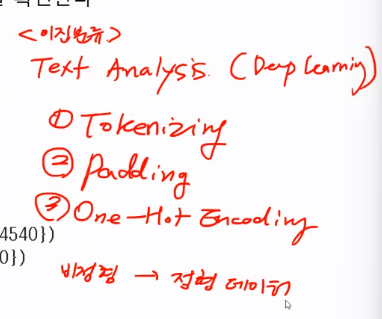

In [267]:
import numpy as np
text_len = [len(line.split(' ')) for line in train_data_text]
print("최소 길이:", min(text_len))
print("최대 길이:", max(text_len))
print("평균 길이:", round(np.mean(text_len),1))
print("중위수 길이:", round(np.median(text_len),1))
print("구간별 최대 길이:", np.percentile(text_len, [0,25,50,75,90,95,99,100]))
print("최소 길이 문장:", train_data_text[np.argmin(text_len)])
print("최대 길이 문장:", train_data_text[np.argmax(text_len)])

최소 길이: 1
최대 길이: 68
평균 길이: 8.8
중위수 길이: 7.0
구간별 최대 길이: [ 1.  4.  7. 11. 19. 26. 35. 68.]
최소 길이 문장: 짱
최대 길이 문장: 찌꺼기 헌터 ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋ


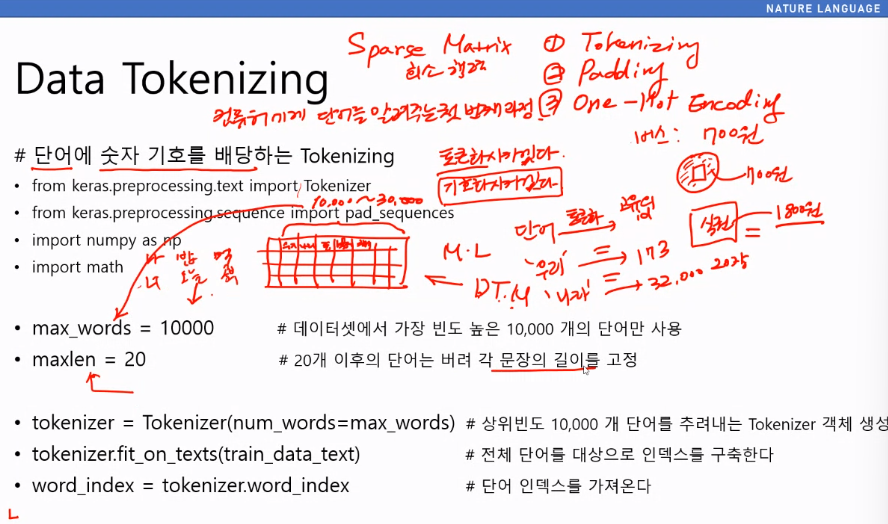

In [274]:
from keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import math

max_words= 10000
maxlen= 20

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data_text)
word_index= tokenizer.word_index

In [279]:
import tensorflow.keras.preprocessing.sequence
dir(tensorflow.keras.preprocessing.sequence)

from keras_preprocessing.sequence import pad_sequences